In [2]:
import pandas as pd
pd.date_range('2000-01-1',periods=4)

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04'], dtype='datetime64[ns]', freq='D')

In [4]:
# computations with DataFrames
# 1) operations between multiple Pandas objects implement auto alignment based on index first
# 2) math operations (+, -, exp, log, etc) apply element by element
# 3) reduction operations (mean, sum, etc) are applied column by column or row by row
# 4) missing values propagrate through binary operations, but not reducing operations

In [20]:
s = pd.Series({'a':4, 'b':-5, 'c':6}) ; s

a    4
b   -5
c    6
dtype: int64

In [23]:
s.abs()

a    4
b    5
c    6
dtype: int64

In [16]:
pd.Series.abs(s) # alternatively, as a function

a    4
b    5
c    6
dtype: int64

In [24]:
s.abs().sum()

15

In [26]:
import numpy as np

squared = lambda x:x*x

list(map(squared, range(4)))

[0, 1, 4, 9]

In [38]:
apply(squared, [3]) # apply might be gone in Python 3

9

In [40]:
s.apply(np.exp) # still, the nomenclature of apply (and not map) is in pandas

a     54.598150
b      0.006738
c    403.428793
dtype: float64

In [137]:
# or, we can create a custom function to each value!
def str_len(x):
    return len(str(x))
s.apply(str_len)

a    1
b    2
c    1
dtype: int64

In [173]:
df = pd.DataFrame({'s1':[1,3,1,-4,0], 's2':[-3,10,12,-17,25], 's3':[3, -4, 5, -6, 7], 'flag':[True, True, False, True, False]}, index=['a','b','c','d','f']) ; df

,flag,s1,s2,s3
a,True,1,-3,3
b,True,3,10,-4
c,False,1,12,5
d,True,-4,-17,-6
f,False,0,25,7


In [174]:
def peak_to_peak(x):
    return x.max() - x.min()
                 
df.apply(peak_to_peak, axis=0) # for DataFrame, apply is actually a reducing operation

flag     1
s1       7
s2      42
s3      13
dtype: int64

In [175]:
# we can group by columns! this creates sub data frames
gb = df.groupby('flag')

In [181]:
gb.groups # these are new DataFrames!

{False: Index([u'c', u'f'], dtype='object'),
 True: Index([u'a', u'b', u'd'], dtype='object')}

In [182]:
for groupname, subdf in gb:
    print(groupname)
    print(subdf)

False
    flag  s1  s2  s3
c  False   1  12   5
f  False   0  25   7
True
   flag  s1  s2  s3
a  True   1  -3   3
b  True   3  10  -4
d  True  -4 -17  -6


In [183]:
gb.mean() # applies the mean to the subgroups determined by groupby

,s1,s2,s3
flag,,,
False,0.5,18.500000,6.000000
True,0.0,-3.333333,-2.333333


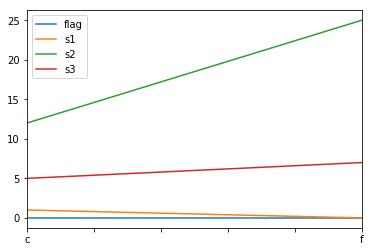

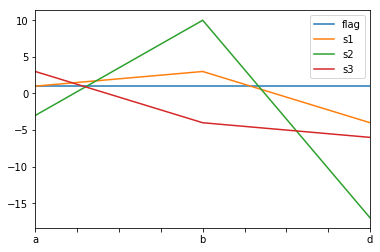

In [184]:
import matplotlib.pyplot as plt
plt.close()
gb.plot() # note: first plot has flag = 0 (for False) and the second has flag = 1 (for True) 
plt.show()

In [185]:
for df in iter(gb):
    print(df)

(False,     flag  s1  s2  s3
c  False   1  12   5
f  False   0  25   7)
(True,    flag  s1  s2  s3
a  True   1  -3   3
b  True   3  10  -4
d  True  -4 -17  -6)


In [186]:
for df in iter(gb):
    print(df[0])

False
True


In [187]:
for df in iter(gb):
    print(df[1])

    flag  s1  s2  s3
c  False   1  12   5
f  False   0  25   7
   flag  s1  s2  s3
a  True   1  -3   3
b  True   3  10  -4
d  True  -4 -17  -6


In [201]:
# we can also apply a function

def even(x):
    return x%2 == 0

df1 = pd.DataFrame({'s1':[1,3,1,-4,0], 's2':[-3,10,12,-17,25], 's3':[3, -4, 5, -6, 7]})
df1.index = df1['s1'] # change index of the DataFrame

gb1 = df1.groupby(even) # this allows you to use a function to evaluate the values in a column, and group by the result

gb1.groups , df1['s1'] # checking

({False: Int64Index([1, 3, 1], dtype='int64', name=u's1'),
  True: Int64Index([-4, 0], dtype='int64', name=u's1')},
 s1
  1    1
  3    3
  1    1
 -4   -4
  0    0
 Name: s1, dtype: int64)

In [202]:
# in a groupby object, we don't use apply or map
# instead, it's called aggregate!
gb1.sum()

,s1,s2,s3
False,5,19,4
True,-4,8,1


In [203]:
import numpy as np
gb1.aggregate(np.sum)

,s1,s2,s3
False,5,19,4
True,-4,8,1


In [208]:
r1 = gb1.agg([np.sum, np.std, np.mean]) # you can apply multiple functions to the subgroups, as well!
r1

s1                      s2                       s3                    
      sum       std      mean sum        std      mean sum       std      mean
False   5  1.154701  1.666667  19   8.144528  6.333333   4  4.725816  1.333333
True   -4  2.828427 -2.000000   8  29.698485  4.000000   1  9.192388  0.500000

In [209]:
r1.columns

MultiIndex(levels=[[u's1', u's2', u's3'], [u'sum', u'std', u'mean']],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 2], [0, 1, 2, 0, 1, 2, 0, 1, 2]])

In [212]:
def demean(x):
    return x - x.mean()

gb1.transform(demean) # this is an apply map for groupby objects

,s1,s2,s3
s1,,,
1,-0.666667,-9.333333,1.666667
3,1.333333,3.666667,-5.333333
1,-0.666667,5.666667,3.666667
-4,-2.000000,-21.000000,-6.500000
0,2.000000,21.000000,6.500000


In [225]:
import numpy
%timeit numpy.arange(100)**2

The slowest run took 20.30 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.15 µs per loop


In [226]:
import numpy
%timeit numpy.arange(100)**2.1

The slowest run took 4.73 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 8.02 µs per loop


In [244]:
# cProfile, prun = sees how long it takes each function
import numpy
%prun numpy.arange(100)**2.1

In [251]:
# run kernprof.py and line_profiler on the file itself!

# once you've identified the expensive function, perform an @profile on it
@profile
def superpower(x):
    return x**x

superpower(4)

TypeError: 'module' object is not callable

In [253]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl  %%prun  %%pypy  %%python  %%python2  %%python3  %%rub

In [276]:
import ctypes.util
m = ctypes.util.find_library('m')
m

'msvcr90.dll'

In [301]:
lib_m = ctypes.CDLL(m)
lib_m # this is a handle to the C code in this library

<CDLL 'msvcr90.dll', handle 59110000 at b8d5f28>

In [302]:
lib_m.sin

In [303]:
lib_m.sin(3) # what the?...
# the 3 is a python object and not a C object, so the function doesn't work as expected!

0

In [306]:
# we'd have to change the input and result types!
lib_m.sin.argtypes = [ctypes.c_double]
lib_m.sin.restype = ctypes.c_double

In [307]:
lib_m.sin(0.5)

0.479425538604203

In [308]:
# ctypes is meant for existing libraries, or for example, if you turn your old C code into a .dll or .so

In [310]:
import subprocess
subprocess.Popen # this creates a pipe
# this lets you use python to write an input deck for an executable
# then the pipe can get the result of the executable, and post-process (in python!)

subprocess.Popen

In [2]:
# pandas DataFrame heirarchical structure

import pandas as pd
ridx = pd.MultiIndex.from_tuples([('A',1),('A',2),('A',3),('B',1),('B',2),('B',3),('C',1),('C',2),('C',3)], names=['d1', 'd2'])
cidx = pd.MultiIndex.from_tuples([('ALPHA','alpha'),('ALPHA','beta'),('BETA','alpha'),('BETA','beta')], names=['d3', 'd4'])
dfmix = pd.DataFrame([(0,1,2,3),(10,11,12,13),(20,21,22,23),
                      (30,31,32,33),(40,41,42,43),(50,51,52,53),
                      (60,61,62,63),(70,71,72,73),(80,81,82,83),                     
                     ], index=ridx, columns=cidx)
dfmix 

d3    ALPHA       BETA     
d4    alpha beta alpha beta
d1 d2                      
A  1      0    1     2    3
   2     10   11    12   13
   3     20   21    22   23
B  1     30   31    32   33
   2     40   41    42   43
   3     50   51    52   53
C  1     60   61    62   63
   2     70   71    72   73
   3     80   81    82   83